In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("walmart_data.csv")

In [3]:
df.shape

(550068, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [56]:
df.shape

(550068, 12)

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [9]:
(df.groupby(['User_ID'])['Marital_Status'].nunique()>1).sum()

0

In [29]:
df.groupby(['User_ID'])['Purchase'].sum()

User_ID
1000001     334093
1000002     810472
1000003     341635
1000004     206468
1000005     821001
            ...   
1006036    4116058
1006037    1119538
1006038      90034
1006039     590319
1006040    1653299
Name: Purchase, Length: 5891, dtype: int64

In [31]:
(df['User_ID'].value_counts()).round(3).head(30)

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
1003618     767
1001150     752
1001015     740
1005795     729
1005831     727
1002909     718
1001449     714
1002063     709
1004344     705
1003391     698
1003841     698
1000424     694
1004510     691
1001980     685
1001088     680
1004227     676
1003808     671
1004508     651
1000549     632
1003224     622
1003539     617
1005367     612
1001285     606
1004543     588
1003824     584
Name: User_ID, dtype: int64

<AxesSubplot:>

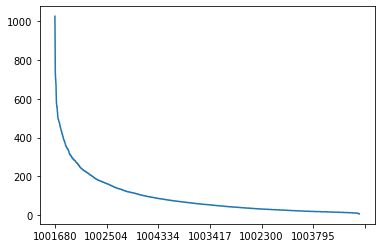

In [36]:
df['User_ID'].apply(str).value_counts().plot()

In [86]:
(df['User_ID'].apply(str).value_counts()>250).value_counts()

False    5411
True      480
Name: User_ID, dtype: int64

In [5]:
high_df = df.loc[df['User_ID'].isin(df['User_ID'].value_counts().head(480).index)]

In [6]:
high_user_df = high_df[['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']].drop_duplicates()

<AxesSubplot:>

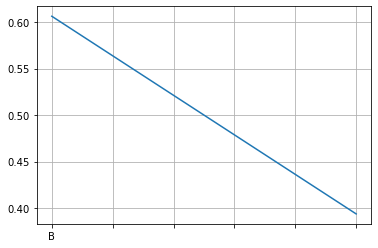

In [7]:
high_user_df['City_Category'].value_counts(normalize=True).plot(grid=True)

<AxesSubplot:>

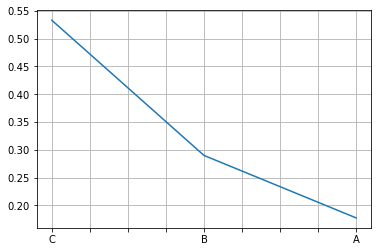

In [100]:
user_df['City_Category'].value_counts(normalize=True).plot(grid=True)

In [61]:
high_df.groupby(['Gender']).nunique()

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
Gender,,,,,,,,,
F,10,2319,5,9,2,3,2,19,3968
M,49,3141,5,16,2,5,2,20,10233


In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [8]:
user_df = df[['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']].drop_duplicates()

In [9]:
user_df.shape

(5891, 7)

In [10]:
df.shape

(550068, 10)

In [11]:
df['User_ID'].nunique()

5891

In [59]:
user_df['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

In [101]:
(user_df['City_Category'].value_counts(normalize=True)*100).round(2)

C    53.28
B    28.98
A    17.74
Name: City_Category, dtype: float64

In [18]:
user_df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,F,0-17,10,A,2,0
4,1000002,M,55+,16,C,4+,0
5,1000003,M,26-35,15,A,3,0
6,1000004,M,46-50,7,B,2,1
9,1000005,M,26-35,20,A,1,1


In [108]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [102]:
df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [42]:
df.loc[df['User_ID']==1001680,['quantity']].value_counts()

quantity
4           357
3           227
5           196
2           141
1           105
dtype: int64

In [107]:
df['Product_ID'].nunique()

3631

In [16]:
prod_qt_df = df.groupby(['Product_ID'])['Purchase'].min().reset_index()

In [123]:
3214.0*5

16070.0

In [124]:
1727.0*5

8635.0

In [18]:
prod_qt_df.columns=['Product_ID', 'unit_cost']

In [19]:
prod_qt_df.head()

,Product_ID,unit_cost
0,P00000142,2725
1,P00000242,3214
2,P00000342,1727
3,P00000442,1764
4,P00000542,1730


In [23]:
df = df.merge(prod_qt_df,how='left',on=['Product_ID'])

In [28]:
df['quantity'] = (df['Purchase']/df['unit_cost']).round(0).apply(int)

In [33]:
df['unit_cost'] = (df['Purchase']/df['quantity']).round(2)

In [34]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,unit_cost,quantity
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,2790.00,3
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,3800.00,4
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,355.50,4
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,352.33,3
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,3984.50,2


In [35]:
df['quantity'].describe()

count    550068.000000
mean          3.497339
std           1.138870
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: quantity, dtype: float64

In [37]:
(df['quantity'].value_counts(normalize=True)*100).round(2)

4    34.10
3    26.27
5    20.54
2    12.72
1     6.36
Name: quantity, dtype: float64

In [43]:
df.groupby(['Product_ID'])['quantity'].describe()

,count,mean,std,min,25%,50%,75%,max
Product_ID,,,,,,,,
P00000142,1152.0,4.125000,0.873393,1.0,4.0,4.0,5.0,5.0
P00000242,376.0,3.223404,0.992282,1.0,3.0,3.0,4.0,5.0
P00000342,244.0,3.004098,1.059924,1.0,2.0,3.0,4.0,5.0
P00000442,92.0,2.695652,0.969186,1.0,2.0,3.0,3.0,5.0
P00000542,149.0,3.053691,0.998548,1.0,2.0,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
P0099442,200.0,3.510000,0.924214,1.0,3.0,4.0,4.0,5.0
P0099642,13.0,1.692308,0.630425,1.0,1.0,2.0,2.0,3.0
P0099742,126.0,2.880952,1.107120,1.0,2.0,3.0,4.0,5.0


In [46]:
df.groupby(['Product_ID'])['unit_cost'].mean()

Product_ID
P00000142    2706.357995
P00000242    3288.319495
P00000342    1777.702295
P00000442    1792.150109
P00000542    1782.242752
                ...     
P0099442     4101.603300
P0099642     3946.230769
P0099742     2756.921349
P0099842     1758.866275
P0099942     1786.691429
Name: unit_cost, Length: 3631, dtype: float64

In [55]:
df.groupby(['User_ID'])['quantity'].agg(['count','mean']).sort_values(by='count',ascending=False).describe().T

,count,mean,std,min,25%,50%,75%,max
count,5891.0,93.374300,107.190049,6.000000,26.000000,54.000000,117.000000,1026.000000
mean,5891.0,3.612898,0.422762,1.066667,3.359919,3.641026,3.904628,4.904255
